In [1]:
%matplotlib inline

Analyse linearity data from T80CamS.

In [2]:
import os
import numpy as np
from matplotlib import pyplot as py

_path = os.path.expanduser('~/Documents/linearity')
filelist_name = 'filelist_mode1_20160801.lis'
file_list_names_control = 'mode1/20160801/control.lis'
file_list_names_lintest = 'mode1/20160801/linearity.lis'

filelist = np.loadtxt(os.path.join(_path,filelist_name),dtype='S')
filelist_control = np.loadtxt(os.path.join(_path,file_list_names_control),dtype='S',unpack=True)
filelist_lintest = np.loadtxt(os.path.join(_path,file_list_names_lintest),dtype='S',unpack=True)

lin = np.load(os.path.join(_path,filelist[0]))
print lin.dtype
# print lin[ref1][0][0]

[('global_mean', '<f8'), ('global_median', '<f8'), ('global_std', '<f8'), ('section_mean_1', '<f8'), ('section_median_1', '<f8'), ('section_std_1', '<f8'), ('section_mean_2', '<f8'), ('section_median_2', '<f8'), ('section_std_2', '<f8'), ('section_mean_3', '<f8'), ('section_median_3', '<f8'), ('section_std_3', '<f8'), ('section_mean_4', '<f8'), ('section_median_4', '<f8'), ('section_std_4', '<f8'), ('section_mean_5', '<f8'), ('section_median_5', '<f8'), ('section_std_5', '<f8'), ('section_mean_6', '<f8'), ('section_median_6', '<f8'), ('section_std_6', '<f8'), ('section_mean_7', '<f8'), ('section_median_7', '<f8'), ('section_std_7', '<f8'), ('section_mean_8', '<f8'), ('section_median_8', '<f8'), ('section_std_8', '<f8'), ('section_mean_9', '<f8'), ('section_median_9', '<f8'), ('section_std_9', '<f8'), ('section_mean_10', '<f8'), ('section_median_10', '<f8'), ('section_std_10', '<f8')]


In [3]:
time = np.zeros(len(filelist_control[1]))
for i in range(len(time)):
    hh,mm,ss = filelist_control[3][i].split('T')[1].split(":")
    time[i] = float(hh)+float(mm)/60.+float(ss)/60./60.
    if i < 5:
        print hh,mm,ss,'=',time[i]
reftime = time[0]
time -= reftime

data = np.zeros((len(filelist_control[0]),2,8))

for i in range(len(filelist_control[0])):
    data[i] += np.load(os.path.join(_path,filelist_control[0][i]))['global_median']
data = data.T

01 21 22.469000 = 1.35624138889
01 22 27.149000 = 1.37420805556
01 23 28.310000 = 1.39119722222
01 25 23.665000 = 1.42324027778
01 26 33.350000 = 1.44259722222


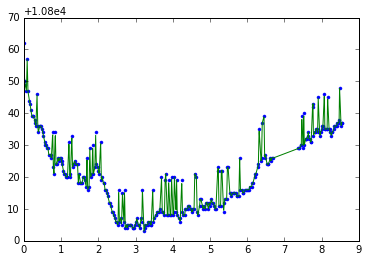

In [4]:
from scipy.interpolate import interp1d

line,column = 4,1
f = interp1d(time, data[line][column])
norm = np.median(data[0][0])/np.mean(data[line][column])
x = np.linspace(0,np.max(time),len(time)*5)
py.plot(time,data[line][column],'.')
py.plot(x,f(x),'-')

01 24 29.996000 = 0.0520908333333
01 28 52.725000 = 0.125071111111
01 33 33.047000 = 0.202938333333
01 37 24.667000 = 0.267277222222
01 41 39.383000 = 0.338031666667
8.49678388889 8.54915111111


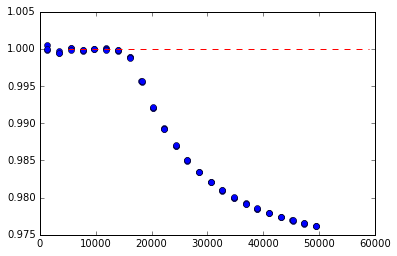

In [5]:
expt_ref = 10.

ltime = np.zeros(len(filelist_lintest[1]))
for i in range(len(ltime)):
    hh,mm,ss = filelist_lintest[3][i].split('T')[1].split(":")
    ltime[i] = float(hh)+float(mm)/60.+float(ss)/60./60. - reftime
    if i < 5:
        print hh,mm,ss,'=',ltime[i] 
print np.max(ltime),np.max(time)
exptime = np.array(filelist_lintest[2],dtype=np.float)

ldata = np.zeros((len(filelist_lintest[0]),2,8))
for i in range(len(filelist_lintest[0])):
    ldata[i] += np.load(os.path.join(_path,filelist_lintest[0][i]))['global_median']
ldata = ldata.T

eflux = f(ltime)*exptime/expt_ref
DRz = ldata[line][column]/ldata[0][0] * norm

mask = ldata[line][column]< 50e3
# for i in range(niter):
#     mean = np.mean(DRz[mask])
#     std = np.std(DRz[mask])
#     mask = np.bitwise_and(DRz < mean+std*3.,
#                         DRz > mean-std*3.)

# py.plot(exptime,DRz,'bo',mfc='w')
# py.plot(exptime[mask],DRz[mask],'bo')
# xlim = py.xlim()
# py.plot(xlim,[mean-3*std,mean-3*std],'r--')
# py.plot(xlim,[mean,mean],'r--')
# py.plot(xlim,[mean+3*std,mean+3*std],'r--')

# py.show()

# py.plot(exptime[mask],DRz[mask],'bo')
# py.plot(exptime[mask],f(ltime)[mask]/expt_ref,'ro')

# py.plot(xlim,[mean-3*std,mean-3*std],'r--')
# py.plot(xlim,[mean,mean],'r--')
# py.plot(xlim,[0.,0.],'r:')
# py.plot(xlim,[mean+3*std,mean+3*std],'r--')
# # ylim = py.ylim()
# py.plot([10.,10.],[mean-3*std,mean+3*std],'r:')
# py.ylim(mean-3*std,mean+3*std)

# py.show()

# py.plot(exptime[mask], ldata[line][column][mask]/exptime[mask],'o')
# py.plot(exptime[mask], f(ltime[mask])/expt_ref,'o')

# py.show()

py.plot(ldata[line][column][mask], DRz[mask],  'o')

coeff = np.load(os.path.join(_path,'linearity_coeff.npy'))
x = np.arange(5e3,6e4,1e3)

py.plot(x,np.zeros_like(x)+1.,'r--')
py.show()

Trying to figure out the linear region of the CCD.

0.994234029644 0.00624006786715
0.994234029644 0.00624006786715
0.997261928799 0.00381682595997
0.999144686157 0.00148430485836
0.99973164775 0.000398106459775


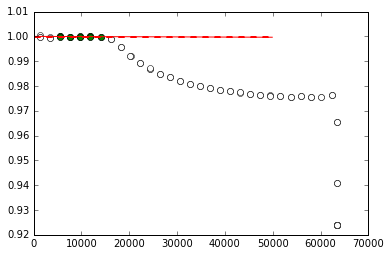

In [6]:
fit_interval = [5e3, 30e3]
niter = 5

mask = np.bitwise_and(ldata[line][column] > fit_interval[0],
                     ldata[line][column] < fit_interval[1])
mean = np.mean(DRz[mask])
std = np.std(DRz[mask])


for iter in range(niter):
    print mean,std
    mean = np.mean(DRz[mask])
    std = np.std(DRz[mask])
    mask = np.bitwise_and(mask,
                         np.bitwise_and(DRz < 1.+2*std,
                                       DRz > 1.-2*std))
    
c = np.polyfit(ldata[line][column][mask], DRz[mask],1)   
p = np.poly1d(c)
xx = np.arange(0,50e3,100)
py.plot(ldata[line][column],DRz,'o',mfc='w')
py.plot(ldata[line][column][mask],DRz[mask],'o')
py.plot(xx,p(xx),'-')
py.plot(xx,np.zeros_like(xx)+mean+3*std,'r--')
py.plot(xx,np.zeros_like(xx)+mean,'r--')
py.plot(xx,np.zeros_like(xx)+mean-3*std,'r--')

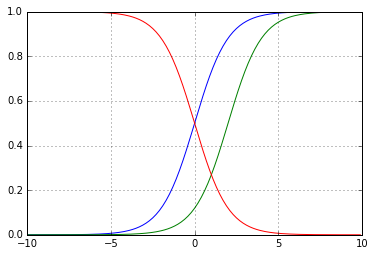

In [7]:
heaviside = lambda x,x0,t : 1 / (1+np.exp(-(x-x0)/t))
x = np.arange(-10,10,0.1)
py.plot(x,heaviside(x,0,1.0))
py.plot(x,heaviside(x,2,1.0))
py.plot(x,1.-heaviside(x,0,1.0))
py.grid()

676.080645161
[  1.27606478e-20  -2.35825003e-15   1.70415502e-10  -5.86498519e-06
   1.05838229e+00]


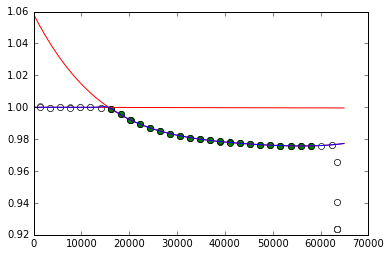

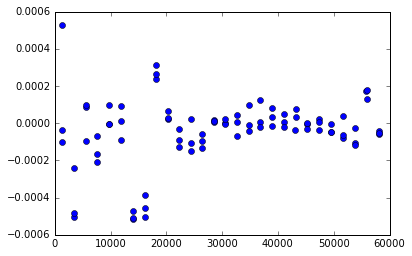

In [11]:
nmask = np.bitwise_and(ldata[line][column] > 15e3,
                       ldata[line][column] < 60e3)

step = np.mean(ldata[line][column][nmask][1:]-ldata[line][column][nmask][:-1])
print step
c2 = np.polyfit(ldata[line][column][nmask], DRz[nmask],4)   
print c2
p2 = np.poly1d(c2)
xx = np.arange(0,65e3,100)
py.plot(ldata[line][column],DRz,'o',mfc='w')

py.plot(ldata[line][column][nmask],DRz[nmask],'o')
py.plot(xx,p(xx),'r-')
py.plot(xx,p2(xx),'r-')

def comb(x):
    return p(x)*(1.-heaviside(x,15.5e3,step)) + p2(x)*heaviside(x,15.5e3,step)

py.plot(xx,comb(xx),'b-')
py.show()

nmask2 = np.bitwise_and(ldata[line][column] >  1e3,
                        ldata[line][column] < 60e3)

py.plot(ldata[line][column][nmask2],DRz[nmask2]-comb(ldata[line][column][nmask2]),'o')
#py.plot(xx,comb(xx),'b-')

Trying to fit composite function with leastsq.

[  1.27606478e-20  -2.35825003e-15   1.70415502e-10  -5.86498519e-06
   1.05838229e+00]
[1.0000017708779712, -6.7296779205620222e-09, 15500.0, 676.08064516129036, 1.0583822871276587, -5.8649851886626625e-06, 1.7041550249762629e-10, -2.3582500318619646e-15, 1.2760647842207223e-20]
(array([  9.99990305e-01,  -2.60661898e-08,   1.66845240e+04,
         1.50090034e+03,   1.04715773e+00,  -4.77558016e-06,
         1.31778897e-10,  -1.76314148e-15,   9.39317774e-21]), 1)


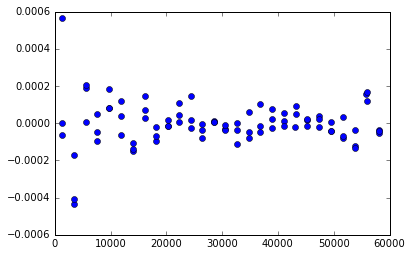

In [32]:
from scipy.optimize import leastsq

def fitfunc(x,y):
    
    return (x[0]+x[1]*y)*(1.-heaviside(y,x[2],x[3])) + (x[4]+x[5]*y+x[6]*y**2.+x[7]*y**3+x[8]*y**4)*heaviside(y,x[2],x[3]) 

def errfunc(par,x,y):
    return fitfunc(par,x) - y

p0 = [c[0],c[1],15.5e3,step,c2[0],c2[1],c2[3],c2[4]]
print c2
p0 = [c[1],c[0],15.5e3,step,c2[4],c2[3],c2[2],c2[1],c2[0]]
print p0

coefs = leastsq(errfunc,p0,args=(ldata[line][column][nmask2],DRz[nmask2]))
print coefs
py.plot(ldata[line][column][nmask2],DRz[nmask2]-fitfunc(coefs[0],ldata[line][column][nmask2]),'o')
xx = np.arange(np.min(ldata),np.max(ldata),1000)
# py.plot(xx,fitfunc(p0,xx),'-')
# py.plot(xx,fitfunc(coefs[0],xx),'-')